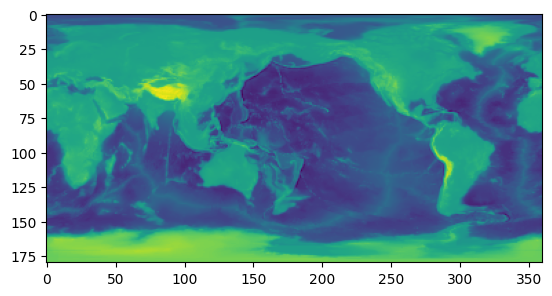

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('topography_180x360_grid.txt')
plt.imshow(data)
plt.show()

# Part 1 - Rise of Oceans

In [2]:
R = 6371000 # radius of earth in meters
area = 0.0
volume = 0.0

longitude = data.shape[1] # longitude 
latitude = data.shape[0] # latitude 

dx = 2 * np.pi * R / longitude
dy = np.pi * R / latitude

for i in range(longitude):
    long = i/longitude * 360
    for j in range(latitude):
        lat = (89.5 - j) / latitude * 180 
        patch = dx * dy  * np.cos(lat * np.pi / 180)
        if data[j, i] < 0:
            area += patch
            volume += patch * abs(data[j, i])
ATotal = 4 * np.pi * R**2
print('Percent of Earth Surface covered by water = ',area / ATotal, '%')
print('Volume of the oceans = ',volume, 'm^3')

Percent of Earth Surface covered by water =  0.7094358722900501 %
Volume of the oceans =  1.3367282835616166e+18 m^3


Now we will simulate just one decade with ocean levels rising at the current rate.

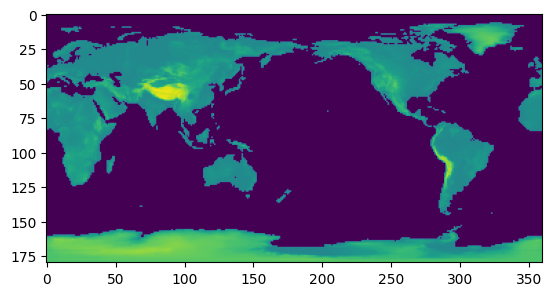

In [3]:
decade_data = np.copy(data)

for i in range(longitude):
        for j in range(latitude):
            if decade_data[j, i] < 0:
                decade_data[j, i] = -5000
for i in range(longitude):
    for j in range(latitude):
        if decade_data[j, i] < 0.037:
            decade_data[j, i] += 0.037
plt.imshow(decade_data)
plt.show()

We will see that there wasn't that big of a change, now we will simulate 50 thousand years. 

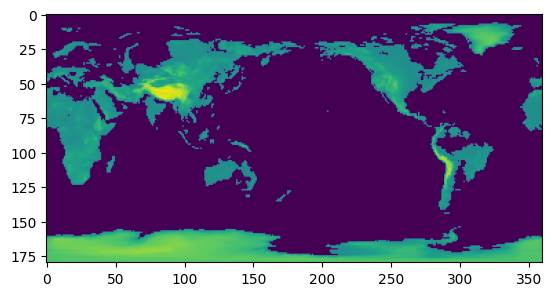

In [4]:
iterations = 100
long_data = np.copy(data)

from matplotlib.animation import FFMpegWriter
metadata = dict(title='Ocean Levels', artist='badass',comment='LAVA')
writer = FFMpegWriter(fps=10, metadata=metadata)
fig = plt.figure()

with writer.saving(fig, "animation1.mp4", dpi=200):

    for i in range(longitude):
        for j in range(latitude):
            if long_data[j, i] < 0:
                long_data[j, i] = -5000
        
    for iteration in range(iterations):
        for i in range(longitude):
            for j in range(latitude):
                if long_data[j, i] < 0.037 * iteration * 50:
                    long_data[j, i] -= 0.037 * iteration * 50
                    if long_data[j, i] < 0:
                        long_data[j, i] = -5000
        
        plt.imshow(long_data)
        writer.grab_frame()
        
    

Now we will see how the proportion of the planet covered by water increases over this time period. Initially we will find final percentage of water covering the surface of Earth.

In [5]:
R = 6371000 # radius of earth in meters
area = 0.0
volume = 0.0

dx = 2 * np.pi * R / longitude
dy = np.pi * R / latitude

for i in range(longitude):
    long = i/longitude * 360
    for j in range(latitude):
        lat = (89.5 - j) / latitude * 180 
        patch = dx * dy  * np.cos(lat * np.pi / 180)
        if long_data[j, i] < 0:
            area += patch
            volume += patch * abs(long_data[j, i])
ATotal = 4 * np.pi * R**2
print('Percent of Earth Surface covered by water = ',area / ATotal, '%')

Percent of Earth Surface covered by water =  0.7807875136948063 %


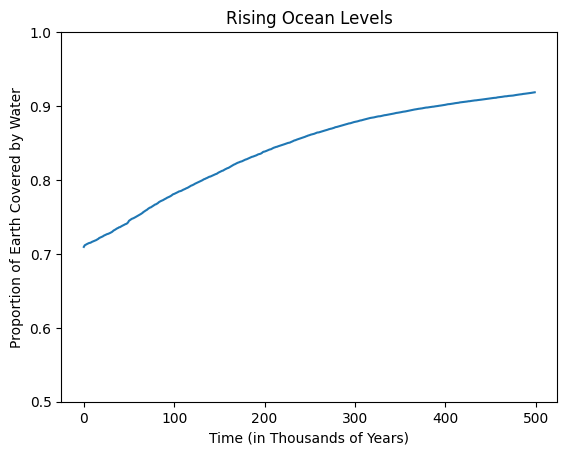

In [6]:
iterations = 500
water_percent = np.copy(data)
metadata = dict(title='Water percent', artist='me',comment='LAVA')
writer = FFMpegWriter(fps=40, metadata=metadata)
fig = plt.figure()
for i in range(longitude):
    for j in range(latitude):
        if water_percent[j, i] < 0:
            water_percent[j, i] = -5000

with writer.saving(fig, "animation2.mp4", dpi=200):
    

    area_array = np.zeros(iterations)
    x = np.linspace(0, iterations - 1, iterations)
    ATotal = 4 * np.pi * R**2
    for iteration in range(iterations):
        for i in range(longitude):
            for j in range(latitude):
                if water_percent[j, i] < 0.037 * iteration * 50:
                    water_percent[j, i] -= 0.037 * iteration * 50
                    if water_percent[j, i] < 0:
                        water_percent[j, i] = -5000
        temp_area = 0
        for i in range(longitude):
            long = i/longitude * 360
            for j in range(latitude):
                lat = (89.5 - j) / latitude * 180 
                patch = dx * dy  * np.cos(lat * np.pi / 180)
                if water_percent[j, i] < 0:
                    temp_area += patch
        
        area_array[iteration] = temp_area / ATotal
        plt.clf()
        plt.ylim(0.5, 1)
        plt.plot(x, area_array)
        plt.xlabel('Time (in Thousands of Years)')
        plt.ylabel('Proportion of Earth Covered by Water')
        plt.title('Rising Ocean Levels')

        writer.grab_frame()
        

# Part 2 - Population Displacement

In [7]:
curr_data = np.loadtxt('population - data.csv', dtype=str, delimiter=',')
for i in range(len(curr_data)):
    curr_data[i][0] = np.round(float(curr_data[i][0])) + 90
    curr_data[i][1] = np.round(float(curr_data[i][0])) + 180

display(curr_data)

array([['126.0', '306.0', '35676000'],
       ['131.0', '311.0', '19354922'],
       ['109.0', '289.0', '19028000'],
       ...,
       ['160.0', '340.0', '0'],
       ['164.0', '344.0', '0'],
       ['151.0', '331.0', '0']], dtype='<U9')

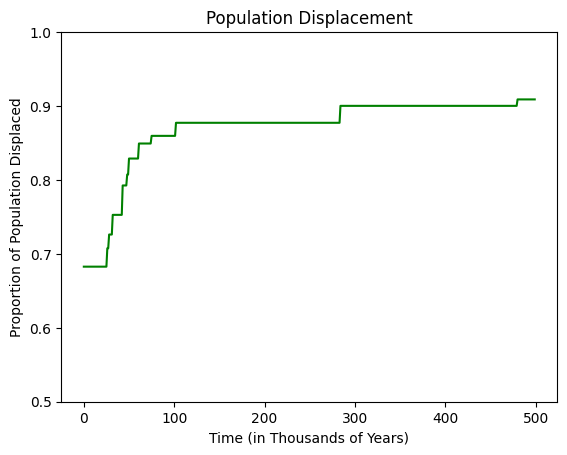

In [8]:
iterations = 500
population_percent = np.copy(data)
from matplotlib.animation import FFMpegWriter
metadata = dict(title='Water percent', artist='me',comment='LAVA')
writer = FFMpegWriter(fps=30, metadata=metadata)
fig = plt.figure()
for i in range(longitude):
    for j in range(latitude):
        if population_percent[j, i] < 0:
            population_percent[j, i] = -5000

pop = np.zeros(iterations)
total_population = 0
for i in range(len(curr_data)):
    total_population += int(curr_data[i][2])

with writer.saving(fig, "animation3.mp4", dpi=200):

    population_array = np.zeros(iterations)
    x = np.linspace(0, iterations - 1, iterations)
    for iteration in range(iterations):
        for i in range(longitude):
            for j in range(latitude):
                if population_percent[j, i] < 0.037 * iteration * 50:
                    population_percent[j, i] -= 0.037 * iteration * 50
                    if population_percent[j, i] < 0:
                        population_percent[j, i] = -5000
        
        pop_displaced = 0
        for i in range(len(curr_data)):
            lat = int(float(curr_data[i][0]))
            long = int(float(curr_data[i][1]))
            if population_percent[lat, long] < 0:
                pop_displaced += int(curr_data[i][2])
        pop[iteration] = pop_displaced / total_population
        plt.clf()
        plt.ylim(0.5, 1)
        plt.plot(x, pop, 'g')
        plt.xlabel('Time (in Thousands of Years)')
        plt.ylabel('Proportion of Population Displaced')
        plt.title('Population Displacement')

        writer.grab_frame()
        